# Project description
Urban mobility significantly contributes to global environmental impact. With the growth in urbanareas worldwide, cities are implementing policies to focus on sustainable urban and mobility devel-opment. Urban areas exhibit high variability in structure, economic output, mobility behaviour,among others. Pinpointing to the exact causes of emissions is impossible. However, understandingthe relationship of mobility with infrastructure resources and other urban indicators may help gov-ernments predict long-term mobility behaviour and intervene with future pathways into sustainablemobility options. </br>

Project goals: You are tasked to identify how mobility is related to the infrastructural form of acity and across multiple cities. Use your findings toward helping governments transform mobilitywithin cities for reducing environmental impacts of mobility use.
Data: </br>
1. Local city-wide indicators of urban mobility: Multi-city Traffic Datasetprovided publicly byThe Institute for Transport Planning and Systems at ETH Zurich.
2. Global city-wide indicators of urban mobility and environmental impacts:Urban TypologiesProject[Reference]3.Get indicators for infrastructure resources from OSMNX (street networks) and PYROSM(amenities and points of interest) python packages.High-level project goals1.Explore, Investigate, and Visualize various factors of the mobility data across cities of interest.2.Describe and incorporate additional data sources that you will use to help you understandrelationships between mobility and the built environment.
3. Identify correlations between mobility and the built environment.4.Perform clustering or LISA analysis on city streets where congestion may be related stronglywith the presence of certain amenities. Think about how that may vary with distance toamenities.
4. Or, train and evaluate models using the mobility data (either as predictors or as the primaryresponse in some fashion) and your data sources.
6. Use and interpret your models to discuss the causes and correlations of or effects due todifferences in congestion across cities or within a city of your choice.
7. Aggregate city-wide findings to correlate with environmental indicators used in data set (2) -urban typology - to comment on policy initiatives of the governments. (Think how you mayaggregate city-wide findings to a single score for the whole city to compare with indicatorsused in data set 

(2))Note: Not all data may be available for all cities. Hence, conduct this analysis for at least5citiesoverlapping between sets1and2in the data. You are welcome to do the analysis in many morecities.

# blabla

In [2]:
# 
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt



In [3]:
UTD19 = pd.read_csv('Data/detectors_public.csv')
UTD19.head()

,detid,length,pos,fclass,road,limit,citycode,lanes,linkid,long,lat
0,U1-52G,0.196037,0.005512,secondary,Gögginger Straße,50,augsburg,1.0,72.0,10.889553,48.359957
1,U1-51G,0.130039,0.004013,secondary,Gögginger Straße,50,augsburg,1.0,73.0,10.889601,48.359945
2,U1-52L,0.155863,0.022228,secondary,Gögginger Straße,50,augsburg,1.0,70.0,10.889355,48.359876
3,U1-51L,0.197675,0.021889,secondary,Gögginger Straße,50,augsburg,1.0,71.0,10.889396,48.359862
4,U1-62,0.065183,0.024465,secondary,Rosenaustraße,50,augsburg,1.0,68.0,10.889361,48.360578


In [4]:
newcitylist= [ 'munich', 'rotterdam', 'frankfurt', 'hamburg', 'zurich']
UTD19Cities = UTD19.loc[UTD19.citycode.isin(newcitylist)]
UTD19Cities.citycode.unique()

array(['frankfurt', 'hamburg', 'munich', 'rotterdam', 'zurich'],
      dtype=object)

In [5]:
# munich, rotterdam, frankfurt, hamburg, zurich
citylist = ['Munich', 'Rotterdam-Hague', 'Frankfurt', 'Hamburg', 'Zurich']

In [6]:
UrbanTypo = pd.read_excel('Data/FINAL-COMBINED-DATASET.xlsx')

In [7]:
Cities = UrbanTypo.loc[(UrbanTypo.City.isin(citylist))]
Cities.reset_index(inplace = True)

In [8]:
Cities.head()

,index,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
0,98,Hamburg,99,9,MassTransit Heavyweight,Germany,42.00,18.00,12,28.00,...,0.016812,0.667477,0.273596,0.437481,0.747204,0.536597,0.035424,0.357805,0.313441,0.231415
1,99,Munich,100,9,MassTransit Heavyweight,Germany,37.00,21.00,14,28.00,...,0.021030,0.674947,0.142531,0.433690,0.779353,0.599366,0.033533,0.354032,0.236366,0.429755
2,101,Frankfurt,102,10,MassTransit Moderate,Germany,38.00,20.00,11,31.00,...,0.033763,0.080828,0.131759,0.403807,0.741574,0.625617,0.044672,0.323014,0.323657,0.342305
3,182,Rotterdam-Hague,183,10,MassTransit Moderate,Netherlands,49.00,17.00,16,18.00,...,NaN,0.356458,0.164029,0.484939,0.750362,0.540186,0.035450,0.204339,0.193488,0.508605
4,238,Zurich,239,10,MassTransit Moderate,Switzerland,42.92,46.31,4.14,5.65,...,0.025206,0.090735,0.346604,0.163072,1.000000,0.575431,0.025346,0.388853,0.185876,0.453369


In [9]:
def GetGraphs(clist, df):
    GraphList = []
    for i in clist:
        maxlonglt = df.loc[df.citycode == i, ['long', 'lat']].max() # maxlonglat[0] = long, 1 lat
        minlonglt = df.loc[df.citycode == i, ['long', 'lat']].min() #
        north = maxlonglt[1] 
        south = minlonglt[1]
        east = maxlonglt[0]
        west = minlonglt[0]
        A = ox.graph.graph_from_bbox(north, south, east, west, network_type='drive')
        GraphList.append(A)
    return GraphList
        
Graphs = GetGraphs(newcitylist, UTD19Cities)

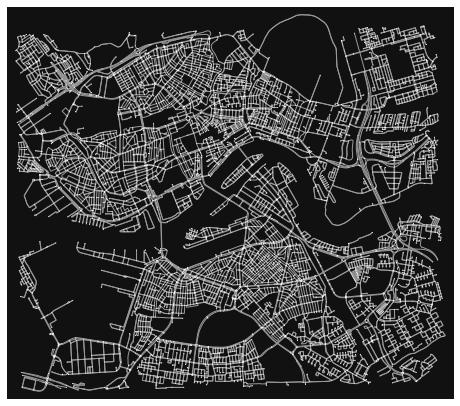

In [10]:
G1 = ox.project_graph(Graphs[1])
fig, ax = ox.plot_graph(G1, node_size=1)

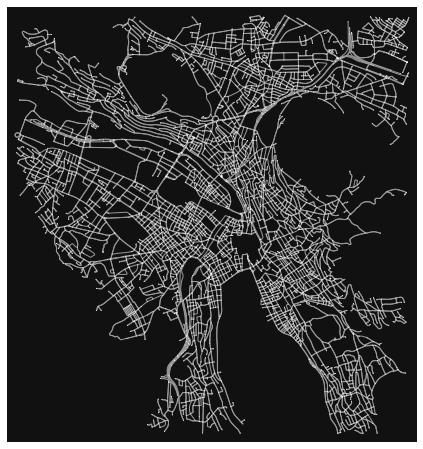

In [11]:
G1 = ox.project_graph(Graphs[4])
fig, ax = ox.plot_graph(G1, node_size=1)

In [12]:
UTD19Cities.loc[UTD19Cities.citycode == 'rotterdam']

,detid,length,pos,fclass,road,limit,citycode,lanes,linkid,long,lat
16321,GRT02_MORO_1811_2_1,0.373911,0.307366,secondary,Kreekhuizenlaan,50,rotterdam,1.0,100.0,4.539146,51.884051
16322,GRT02_MORO_1822_2_1,1.041926,0.533046,secondary,Groeninx van Zoelenlaan,80,rotterdam,1.0,90.0,4.561430,51.884623
16323,GRT02_MORO_1293_2_1,0.168822,0.074032,secondary,Schiekade,50,rotterdam,1.0,47.0,4.475207,51.927265
16324,GRT02_MORO_1293_2_2,0.168822,0.074032,secondary,Schiekade,50,rotterdam,1.0,47.0,4.475207,51.927265
16325,GRT02_MORO_1851_2_1,0.589675,0.148455,trunk,Vaanweg,50,rotterdam,1.0,96.0,4.512462,51.874034
...,...,...,...,...,...,...,...,...,...,...,...
16575,GRT02_MORO_1774_2_1,0.416623,0.157682,secondary,Adriaan Volkerlaan,50,rotterdam,1.0,87.0,4.545496,51.893602
16576,GRT02_MORO_1367_2_1,0.919353,0.817885,secondary,Prins Hendrikkade,50,rotterdam,1.0,61.0,4.498277,51.914055
16577,GRT02_MORO_1367_2_2,0.919353,0.817885,secondary,Prins Hendrikkade,50,rotterdam,1.0,61.0,4.498277,51.914055
16578,GRT02_MORO_1411_2_1,0.908734,0.557506,secondary,Boezemlaan,50,rotterdam,1.0,51.0,4.493918,51.940705


In [13]:
Rotterdam = Graphs[1]
node_data, edge_attributes = ox.graph_to_gdfs(Rotterdam) # Get node info and edge info

NameLink = pd.DataFrame(edge_attributes[['osmid','name']]) # only extract the osmid and road name
NameLink.rename({'name': 'road'}, inplace = True, axis = 1) # The Graph network has more raods in it than UTD

URotterdam = UTD19Cities.loc[UTD19Cities.citycode == 'rotterdam', ['detid', 'road']] #only get detid and road name

In [14]:
# some entries are a list of street names 
NameLink = NameLink.explode('road') # use this to create entry with same values, so road is not a list anymore
NameLink = NameLink.explode('osmid') # some roads have two osmid -> explode

TranslateTable = pd.merge(NameLink, URotterdam, on = 'road', how = 'right')

In [17]:
TranslateTable # using this table translate detid to graph?

,osmid,road,detid
0,48400943,Kreekhuizenlaan,GRT02_MORO_1811_2_1
1,7326948,Kreekhuizenlaan,GRT02_MORO_1811_2_1
2,7326613,Kreekhuizenlaan,GRT02_MORO_1811_2_1
3,7326943,Kreekhuizenlaan,GRT02_MORO_1811_2_1
4,7326613,Kreekhuizenlaan,GRT02_MORO_1811_2_1
...,...,...,...
13903,7515170,Maastunnel,GRT02_MORO_1277_2_1
13904,7515171,Maastunnel,GRT02_MORO_1277_2_1
13905,199833187,Maastunnel,GRT02_MORO_1277_2_1
13906,7515174,Maastunnel,GRT02_MORO_1277_2_1


In [ ]:
edge_attributes.head()

NewDataFrame = pd.DataFrame(columns=edge_attributes.columns)

for index, i in enumerate(edge_attributes.name):
    copy = edge_attributes.iloc[index]
    if type (i) == list:
        copy = edge_attributes.iloc[index]
        osmidlist = copy['osmid']
        namelist = copy ['name']
        
        Olength = len (osmidlist)    
        Nlength = len (namelist)
        
        while True:
            if Olength == Nlength:
                length = Olength
                break
            else:
                if Olength > Nlength:
                    osmidlist.pop(Olength-1)
                    Olength = len(osmidlist)
                    print (Olength, Nlength, 'o was langer')
                if Olength < Nlength:
                    namelist.pop(Nlength-1)
                    Nlength = len(namelist)
                    print (Olength, Nlength, 'n was langer')

                    
        for j in range (length):
            NewCopy = copy
            NewCopy['osmid'] = osmidlist[j]
            NewCopy['name'] = namelist[j]
            NewDataFrame = NewDataFrame.append(NewCopy, ignore_index=True)
    else:
        NewDataFrame = NewDataFrame.append(copy, ignore_index = True)
    
    
NewDataFrame.head()

In [109]:
 # df[~df.country.isin(countries_to_keep)]
    
#edge_attributes = edge_attributes[~edge_attributes.osmid.isin(TranslateTable.osmid)]
#df = df[~df.osmid.isin(TranslateTable.osmid)] # idea only take the osmids that appear in translate table
edge_attributes

,osmid,name,highway,oneway,length,bridge,geometry,maxspeed,lanes,ref,junction,tunnel,access,u,v,key,X
0,"[311806104, 311806106, 321898179]",'s-Gravenweg,residential,False,88.311,yes,"LINESTRING (4.52452 51.92392, 4.52412 51.92331...",NaN,NaN,NaN,NaN,NaN,NaN,44417024,771255062,0,1
1,7514536,Frans Bekkerstraat,residential,False,61.119,NaN,"LINESTRING (4.46527 51.89180, 4.46613 51.89165)",NaN,NaN,NaN,NaN,NaN,NaN,44269570,44269098,0,0
2,7515679,Frans Bekkerstraat,residential,False,76.835,NaN,"LINESTRING (4.46527 51.89180, 4.46496 51.89218...",50,NaN,NaN,NaN,NaN,NaN,44269570,963879003,0,1
3,"[7515714, 7515628]",Verboomstraat,residential,False,145.552,NaN,"LINESTRING (4.46527 51.89180, 4.46528 51.89177...",50,NaN,NaN,NaN,NaN,NaN,44269570,44262667,0,0
4,7319072,Schultz van Hagenstraat,residential,False,48.438,NaN,"LINESTRING (4.52872 51.92385, 4.52848 51.92344)",NaN,NaN,NaN,NaN,NaN,NaN,44417028,44412933,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17148,7513502,Putselaan,residential,True,74.466,NaN,"LINESTRING (4.50077 51.89826, 4.50060 51.89831...",NaN,NaN,NaN,NaN,NaN,NaN,735821821,735821808,0,1
17149,"[494919621, 7513646]",Putselaan,secondary,True,269.995,NaN,"LINESTRING (4.50077 51.89826, 4.49987 51.89819...",50,3,S120,NaN,NaN,NaN,735821821,4801683177,0,0
17150,7515716,Kesterenstraat,unclassified,False,31.071,NaN,"LINESTRING (4.45556 51.89186, 4.45522 51.89205)",NaN,NaN,NaN,NaN,NaN,NaN,44269566,44270495,0,1
17151,7515718,NaN,unclassified,False,21.159,NaN,"LINESTRING (4.45556 51.89186, 4.45563 51.89205)",NaN,NaN,NaN,NaN,NaN,NaN,44269566,44270498,0,0


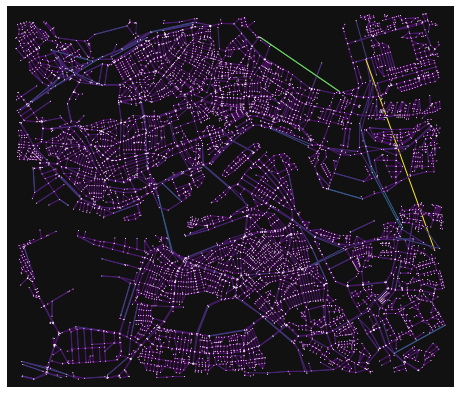

In [110]:
# way to add colors to edges
x = [1 if x%2 == 0 else 0 for x in edge_attributes.index] # create some random atribute

edge_attributes['X']=x # set att

WithX = ox.graph_from_gdfs(node_data, edge_attributes, graph_attrs={'edge_attr':'X'}) # graph_attrs and edge works it is safed! and able to call back
WithX.graph['crs'] = Rotterdam.graph['crs'] # need crs to plot
ec = ox.plot.get_edge_colors_by_attr(WithX, attr='length', cmap='viridis') # set color scale by atribute (now length could be any other variable)

G1 = ox.project_graph(WithX)
fig, ax = ox.plot_graph(G1, node_size=1, edge_color=ec) # edgecolor is stored in ec


In [17]:
# try plotting only the roads that are in UTD9
len(TranslateTable.osmid.unique())

2014

In [18]:
len(TranslateTable.detid.unique())

259

In [19]:
print (Rotterdam.osmid)

AttributeError: 'MultiDiGraph' object has no attribute 'osmid'